In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [2]:
train = pd.read_csv('trai.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [5]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('imag/'+train['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 9/9 [00:00<00:00, 34.46it/s]


In [6]:
X.shape

(9, 400, 400, 3)

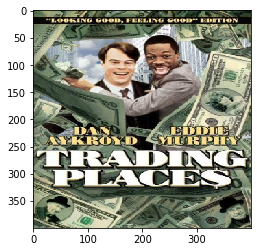

In [7]:
plt.imshow(X[2])

In [8]:
train['Genre'][2]

"['Comedy']"

In [10]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))


In [11]:
y.shape

(9, 25)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [13]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 64)        51264     
__________

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 8 samples, validate on 1 samples
Epoch 1/10
8/8 [==============================] - 4s - loss: 0.7490 - acc: 0.4850 - val_loss: 0.6029 - val_acc: 0.7200
Epoch 2/10
8/8 [==============================] - 1s - loss: 0.9622 - acc: 0.6300 - val_loss: 0.6790 - val_acc: 0.5600
Epoch 3/10
8/8 [==============================] - 1s - loss: 0.7441 - acc: 0.5250 - val_loss: 0.6844 - val_acc: 0.6000
Epoch 4/10
8/8 [==============================] - 1s - loss: 0.6879 - acc: 0.5550 - val_loss: 0.6884 - val_acc: 0.6800
Epoch 5/10
8/8 [==============================] - 1s - loss: 0.6726 - acc: 0.6100 - val_loss: 0.6846 - val_acc: 0.6800
Epoch 6/10
8/8 [==============================] - 1s - loss: 0.6740 - acc: 0.5950 - val_loss: 0.6762 - val_acc: 0.7600
Epoch 7/10
8/8 [==============================] - 1s - loss: 0.6579 - acc: 0.6650 - val_loss: 0.6583 - val_acc: 0.7600
Epoch 

In [18]:
img = image.load_img('GOT.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

Romance (0.54)
Drama (0.523)
Thriller (0.519)


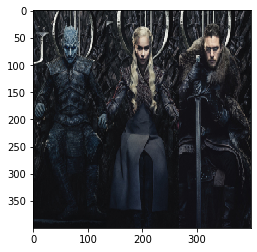

In [19]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [20]:
img = image.load_img('golmal.jpeg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

Romance (0.595)
Drama (0.555)
Thriller (0.547)


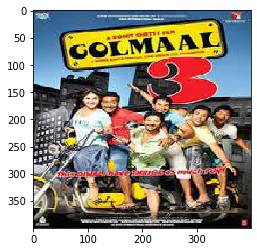

In [21]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)